## **Bibliotecas**
---

In [1]:
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import numpy as np

## **Image Classification using the Digits Dataset and the SDG Algorithm**
---

In [2]:
# Load the digits dataset
digits = datasets.load_digits()

# Extract data and targets
x_digits = digits.data
y_digits = digits.target

In [3]:
# Divide the dataset into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x_digits, y_digits, test_size=0.2, random_state=42)

print("Number of training samples:", len(x_train))
print("Number of testing samples:", len(x_test))

Number of training samples: 1437
Number of testing samples: 360


In [4]:
# Create the SDG model
sgd_classifier = SGDClassifier(max_iter=1000, random_state=42)

# Begin training process
sgd_classifier.fit(x_train, y_train)

# Use the 'predict' method
y_pred = sgd_classifier.predict(x_test)

# Measure the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("SGDClassifier's accuracy in the testing set:", accuracy)

SGDClassifier's accuracy in the testing set: 0.9555555555555556


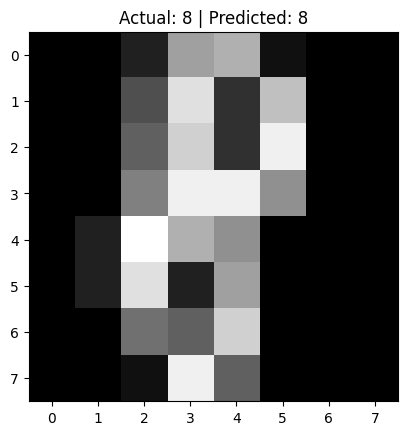

In [5]:
# Select a random sample amongst the training set
sample_index = np.random.randint(0, len(x_test))
sample_image = x_test[sample_index].reshape(8, 8)
true_label = y_test[sample_index]

# Use the 'predict' method
predicted_label = sgd_classifier.predict([x_test[sample_index]])[0]

# Visualize image and it's prediction
plt.imshow(sample_image, cmap='gray')
plt.title(f"Actual: {true_label} | Predicted: {predicted_label}")
plt.show()

## **Encoding and Normalization**
---

In [6]:
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [7]:
# Create a sample dataset
data = pd.DataFrame({
    'Age': [25, 30, 35, 40],
    'Gender': ['F', 'M', 'F', 'M'],
    'Salary': [50000, 80000, 60000, 70000],
    'Class': ['A', 'B', 'A', 'B']
})

# Divide data into resources (x) and labels (y)
x = data.drop('Class', axis=1)
y = data['Class']

# Split dataset into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Define the columns to be normalized and the ones to be one-hot encoded
numeric_features = ['Age', 'Salary']
categorical_features = ['Gender']

# Create a transformer to apply normalization and one-hot encoding
preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numeric_features),
    ('cat', OneHotEncoder(), categorical_features)
])

# Apply transformation to the data
x_transformed = preprocessor.fit_transform(x)

# Show transformed data column by column
print('Original Data:')
print(x)

# Column 1: 'Age' (Normalized)
print("\nColumn 1 ('Age') after normalization:")
print(x_transformed[:, 0])

# Column 2: 'Salary' (Normalized)
print("\nColumn 2 ('Salary') after normalization:")
print(x_transformed[:, 1])

# Column 3 and 4: 'Gender' (One-hot encoded)
print("\nColumn 3 and 4 ('Gender') after one-hot encoding:")
print(x_transformed[:, 2:])

# Final data
print('\n Final Data:')
print((x_transformed))

Original Data:
   Age Gender  Salary
0   25      F   50000
1   30      M   80000
2   35      F   60000
3   40      M   70000

Column 1 ('Age') after normalization:
[0.         0.33333333 0.66666667 1.        ]

Column 2 ('Salary') after normalization:
[0.         1.         0.33333333 0.66666667]

Column 3 and 4 ('Gender') after one-hot encoding:
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]

 Final Data:
[[0.         0.         1.         0.        ]
 [0.33333333 1.         0.         1.        ]
 [0.66666667 0.33333333 1.         0.        ]
 [1.         0.66666667 0.         1.        ]]


## **Logistic Regression**
---

In [8]:
# Load the iris flower dataset
iris = datasets.load_iris()
x = iris.data[:, :2]  # We will only use 2 features to facilitate visualization
y = (iris.target != 0) * 1  # Transforming into a binary classification problem

# Split dataset into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
# Intialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(x_test)

# Calculate the model's accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Model accuracy: {accuracy * 100:.2f}%')

Model accuracy: 100.00%


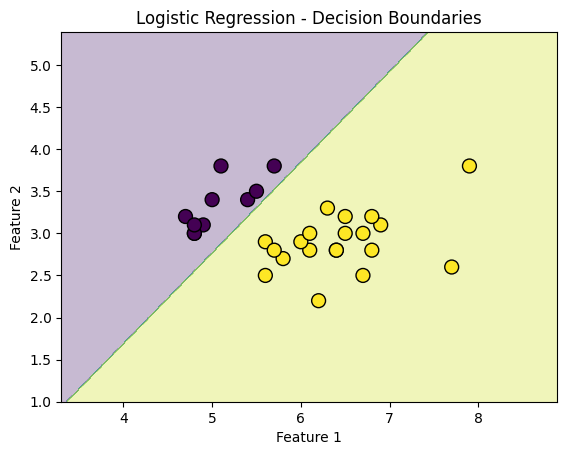

In [10]:
# Visualizing the decision boundaries
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolors='k', marker='o', s=100, linewidth=1)
plt.title("Logistic Regression - Decision Boundaries")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## **Binary Classification using MPLClassifier**
---

In [11]:
# Generate sample dataset
x, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split dataset into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

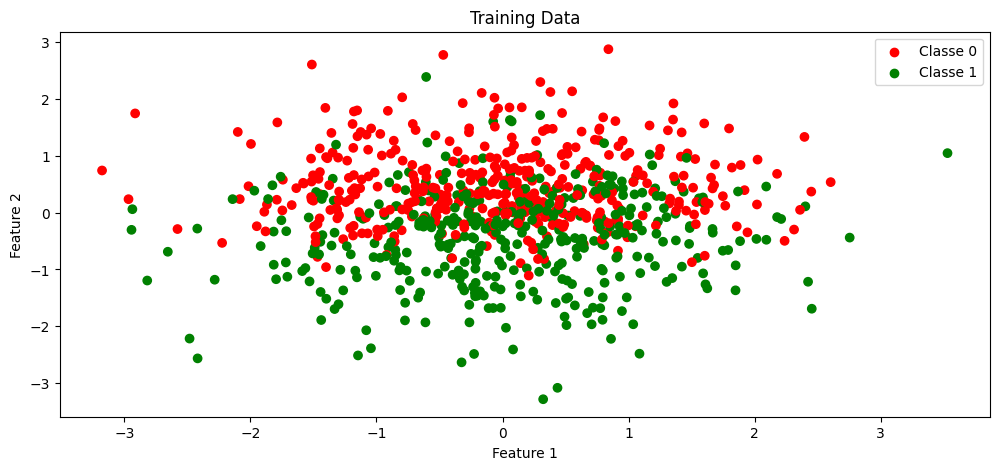

In [12]:
# Plot training data
plt.figure(figsize=(12, 5))

# Mapping colors to the classes
color_map = {0: 'red', 1: 'green'}
plt.scatter(x_train[:, 0], x_train[:, 1], c=[color_map[label] for label in y_train])

plt.title('Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Caption
for class_label, color in color_map.items():
    plt.scatter([], [], c=color, label=f'Classe {class_label}')

plt.legend()
plt.show()

In [13]:
# Create the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=800, random_state=42)

# Train the classifier
classifier.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(x_test)# Data
print(x)

# Labels
print(y, y.shape[0])

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

[[-0.6693561  -1.49577819 -0.87076638 ... -1.26733697 -1.2763343
   1.01664321]
 [ 0.09337237  0.78584826  0.10575379 ... -0.12270893  0.6934308
   0.91136272]
 [-0.90579721 -0.60834121  0.29514098 ...  0.83049813 -0.73733198
  -0.5782121 ]
 ...
 [-0.20013455 -1.46108168  1.79701652 ... -1.50280171 -1.27473745
   1.60111869]
 [ 0.03935575  0.24868361 -0.47532342 ...  0.09912579  0.54269228
   1.20827474]
 [ 0.76921528  0.47076539  0.16994471 ...  0.6561162   0.64333186
  -2.02100232]]
[1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0
 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0
 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0
 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1
 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1
 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1

In [14]:
# Generate a new dataset
new_data = np.random.rand(1, 20)

# Realizar a previsão do novo dado
prediction = classifier.predict(new_data)

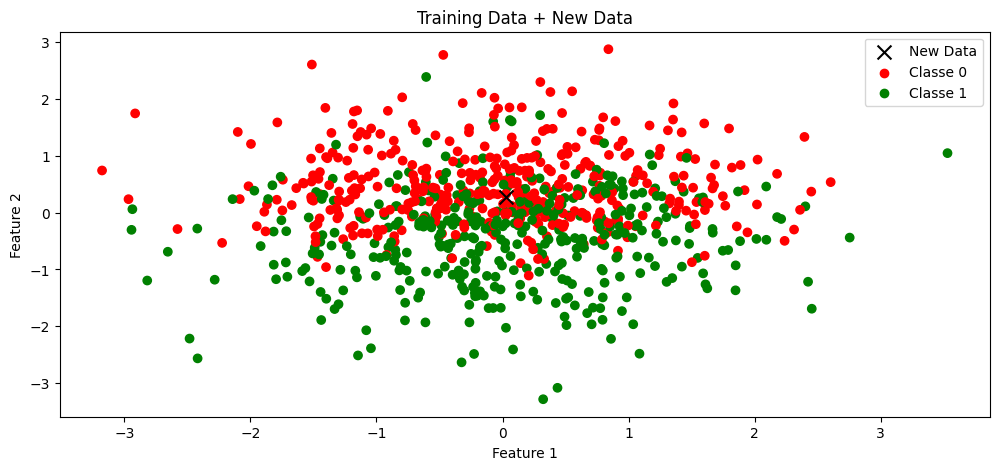


New data prediction: 0


In [15]:
# Plot the training data
plt.figure(figsize=(12, 5))
plt.scatter(x_train[:, 0], x_train[:, 1], c=[color_map[label] for label in y_train])

# Add new data to the plot
plt.scatter(new_data[:, 0], new_data[:, 1], c='black', marker='x', s=100, label='New Data')

plt.title('Training Data + New Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Caption
for class_label, color in color_map.items():
    plt.scatter([], [], c=color, label=f'Classe {class_label}')

# Plot
plt.legend()
plt.show()

# Show prediction to the new data
print(f'\nNew data prediction: {prediction[0]}')

# ***Exercícios - Scikit Learn***
---

## **01**
---

In [16]:
names = [
    'Linear SVC',
    'Multilayer Perceptron',
    'Gaussian Naive Bayes',
]

classifiers = [
    SVC(kernel="linear", C=0.025, random_state=42),
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=800, random_state=42),
    GaussianNB(),
]

## **02**
---

In [17]:
# Load the Labeled Faces in the Wild (LFW) dataset
lfw = datasets.fetch_lfw_people(min_faces_per_person=100)
x = lfw.data
y = lfw.target

# Split dataset into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **03**
---

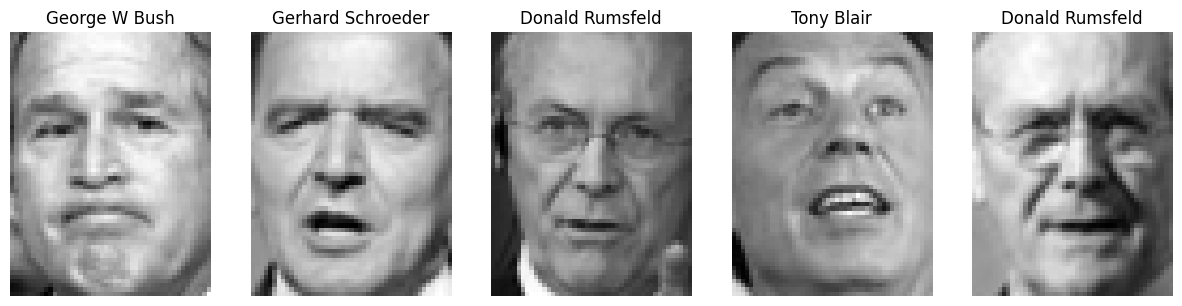

In [18]:
# Visualizing the data
figures, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
for ax, image, label in zip(axes, x, y):
    ax.set_axis_off()
    image = image.reshape(62, 47)
    ax.imshow(image, cmap='gray', interpolation="nearest")
    ax.set_title(f"{lfw.target_names[label]}")

## **04**
---

In [19]:
# No preprocessing needed for this dataset

## **05 - 06**
---

In [21]:
for name, classifier in zip(names, classifiers):
    # Train the classifier
    classifier.fit(x_train, y_train)

    # Make predictions on the testing set
    y_pred = classifier.predict(x_test)

    # Evaluate the model's accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} accuracy: {accuracy}')

Linear SVC accuracy: 0.881578947368421
Multilayer Perceptron accuracy: 0.8947368421052632
Gaussian Naive Bayes accuracy: 0.5043859649122807
